In [2]:
import pandas as pd
import numpy as np
from PyBioMed.PyGetMol import GetProtein
from PyBioMed import Pyprotein
from zipfile import ZipFile

In [2]:
def clean(zippath, filename):
    init = ZipFile(zippath, 'r').open(filename)
    data = pd.read_csv(init)
    data1 =data[data['macromoleculeType']=='Protein']
    data2 =data1[data1['chainId']=='A']
    sequences = data2.sequence.tolist()
    indices = data2.structureId
    return sequences, indices


In [89]:
def descr_dataframe(sequences, indices):
    array = []
    keys = Pyprotein.PyProtein(sequences[0]).GetAAComp().keys()
    for sequence in sequences:
        protein_class = Pyprotein.PyProtein(sequence)
    #     print(sequence)
        dicti = protein_class.GetAAComp()
        array.append(dicti.values())
    #     keys.append(dicti.keys())
    array = np.array(array)
    df = pd.DataFrame(array,columns=keys, index=indices)
    return df

def descr_dataframe_autocorrelation(sequences, indices, limit=None):
    array = []
    keys = []
    protein = Pyprotein.PyProtein(sequences[0])
    keys.extend(protein.GetMoreauBrotoAuto().keys())
    keys.extend(protein.GetMoranAuto().keys())
    keys.extend(protein.GetGearyAuto().keys())
    for i in range(len(sequences[:limit])):
        protein_class = Pyprotein.PyProtein(sequences[i])
        dicti = {}
        dicti.update(protein_class.GetMoreauBrotoAuto())
        dicti.update(protein_class.GetMoranAuto())
        dicti.update(protein_class.GetGearyAuto())
        array.append(dicti.values())
        if i%100 == 0: print('Done '+str(i) + ' of '+ str(len(sequences)))
    #     keys.append(dicti.keys())
    array = np.array(array)
    df = pd.DataFrame(array,columns=keys, index=indices[:limit])
    return df

In [ ]:
sequences, indices = clean("C:/Users/Gerardo/ADB/Capstone/PyBioMed-1.0/11797_16251_bundle_archive.zip",
                           'pdb_data_seq.csv')
df = descr_dataframe(sequences, indices)

In [4]:
i = None
df.iloc[10:i]

,A,C,E,D,G,F,I,H,K,M,L,N,Q,P,S,R,T,W,V,Y
structureId,,,,,,,,,,,,,,,,,,,,
107M,11.039,0.000,9.091,3.896,7.143,4.545,5.844,7.792,12.338,1.948,11.688,1.299,3.247,2.597,3.896,2.597,3.247,1.299,4.545,1.948
108L,9.756,0.000,4.878,6.098,6.707,3.049,6.707,0.610,7.927,3.049,9.756,7.317,3.049,1.829,3.049,7.927,7.317,1.829,5.488,3.659
108M,11.039,0.000,9.091,3.896,7.143,4.545,5.844,7.792,12.338,1.948,11.688,1.299,3.247,2.597,3.896,2.597,3.247,1.299,4.545,1.948
109L,9.756,0.000,4.878,6.098,6.707,3.049,6.098,0.610,8.537,3.049,9.756,7.317,3.049,1.829,3.049,7.927,7.317,1.829,5.488,3.659
109M,11.039,0.000,9.091,3.896,7.143,3.896,5.844,7.792,12.338,1.948,11.688,1.299,3.247,2.597,3.896,2.597,3.247,1.299,5.195,1.948
10GS,7.177,1.914,4.785,6.220,8.612,3.349,3.349,0.957,5.742,0.957,15.311,3.828,6.220,5.263,4.785,3.828,4.306,0.957,6.699,5.742
110L,9.756,0.000,4.878,6.098,6.707,3.049,6.098,0.610,7.927,3.049,10.366,7.317,3.049,1.829,3.049,7.927,7.317,1.829,5.488,3.659
110M,11.039,0.000,9.091,3.896,7.143,3.896,5.844,7.792,12.338,1.948,11.688,1.299,3.247,2.597,3.896,2.597,3.247,1.299,5.195,1.948
111L,9.756,0.000,4.878,6.098,6.707,3.049,6.098,0.610,7.927,3.049,9.756,7.927,3.049,1.829,3.049,7.927,7.317,1.829,5.488,3.659


In [5]:
def All_descr_dataframe(sequences, indices, limit=None):
    array = []
    keys = Pyprotein.PyProtein(sequences[0]).GetALL().keys()
    for sequence in sequences[:limit]:
        protein_class = Pyprotein.PyProtein(sequence)
        print('Done')
    #     print(sequence)
        dicti = protein_class.GetALL()
        array.append(dicti.values())
    #     keys.append(dicti.keys())
    array = np.array(array)
    df = pd.DataFrame(array,columns=keys, index=indices[:limit])
    return df

In [6]:
def All_descr_dataframe(sequences, indices, limit=None):
    array = []
    keys = Pyprotein.PyProtein(sequences[0]).GetALL().keys()
    for sequence in sequences[:limit]:
        protein_class = Pyprotein.PyProtein(sequence)
        print('Done')
    #     print(sequence)
        dicti = protein_class.GetALL()
        array.append(dicti.values())
    #     keys.append(dicti.keys())
    array = np.array(array)
    df = pd.DataFrame(array,columns=keys, index=indices[:limit])
    return df

In [8]:
tre = All_descr_dataframe(sequences, indices, limit=1).columns

Done


In [9]:
def descr_dataframe(sequences, indices):
    array = []
    keys = Pyprotein.PyProtein(sequences[0]).GetCTD().keys()
    for i in range(len(sequences)):
        protein_class = Pyprotein.PyProtein(sequences[i])
        if i%10000 == 0: print('Done '+str(i) + ' of '+ str(len(sequences)))
        dicti = protein_class.GetCTD()
        array.append(dicti.values())
    #     keys.append(dicti.keys())
    array = np.array(array)
    df = pd.DataFrame(array,columns=keys, index=indices)
    return df

df = descr_dataframe(sequences, indices)

Done 0 of 123105
Done 10000 of 123105


KeyboardInterrupt: 

In [ ]:
df.to_csv('ciao.csv')

In [7]:
df = pd.read_csv('ciao.csv')

In [8]:
df

,structureId,_NormalizedVDWVD1075,_PolarityD1075,_SecondaryStrD3025,_PolarityD3100,_ChargeD1100,_SecondaryStrT23,_PolarityD3025,_NormalizedVDWVC1,_NormalizedVDWVC3,...,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_PolarizabilityD1001,_NormalizedVDWVD2075,_ChargeD2100,_PolarizabilityD2100,_PolarityC1,_PolarityC3,_PolarityC2
0,101M,78.571,70.130,23.377,96.104,96.104,0.072,29.870,0.318,0.312,...,0.461,0.325,0.214,2.597,70.130,100.000,99.351,0.318,0.227,0.162
1,102L,71.515,69.697,23.030,98.788,98.788,0.177,21.212,0.358,0.279,...,0.430,0.370,0.200,6.061,70.909,100.000,100.000,0.327,0.164,0.170
2,102M,78.571,70.130,23.377,96.104,96.104,0.072,29.870,0.325,0.312,...,0.468,0.325,0.208,2.597,71.429,100.000,99.351,0.318,0.221,0.162
3,103L,71.856,70.060,23.952,98.802,98.802,0.175,20.958,0.359,0.275,...,0.425,0.371,0.204,5.988,68.263,100.000,100.000,0.329,0.162,0.168
4,103M,78.571,70.130,23.377,96.104,96.104,0.072,29.870,0.325,0.312,...,0.468,0.325,0.208,2.597,71.429,100.000,99.351,0.318,0.221,0.162
5,104L,71.687,69.880,22.892,98.795,98.795,0.176,21.084,0.361,0.277,...,0.434,0.367,0.199,6.024,71.084,100.000,100.000,0.325,0.163,0.169
6,104M,79.085,72.549,22.876,96.078,96.078,0.072,29.412,0.327,0.314,...,0.464,0.327,0.209,1.961,69.935,100.000,99.346,0.314,0.229,0.157
7,105M,79.085,72.549,22.876,96.078,96.078,0.072,29.412,0.327,0.314,...,0.464,0.327,0.209,1.961,69.935,100.000,99.346,0.314,0.229,0.157
8,106M,78.571,70.130,23.377,96.104,96.104,0.072,29.870,0.318,0.325,...,0.461,0.325,0.214,2.597,71.429,100.000,99.351,0.318,0.227,0.162
9,107L,71.341,69.512,23.171,98.780,98.780,0.178,21.341,0.354,0.280,...,0.433,0.372,0.195,6.098,70.732,100.000,100.000,0.329,0.165,0.171


In [ ]:
init = ZipFile('ciao.zip', 'r').open('ciao.csv')
datas = pd.read_csv(init)
init.close()

In [ ]:
datas

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df.drop('structureId',axis=1, inplace=True)
pca.fit(df)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pd.DataFrame(pca.transform(df))
# pca.components_

,0,1,2
0,-1.422267,8.741993,-12.134662
1,-4.998364,9.305024,-13.099944
2,-2.164826,8.371407,-12.433546
3,-5.768778,10.204895,-13.357766
4,-2.164826,8.371407,-12.433546
5,-5.049030,9.791332,-11.081053
6,-0.723244,8.257592,-15.133351
7,-0.723244,8.257592,-15.133351
8,-1.134260,7.591227,-11.417921
9,-5.326419,8.279552,-15.969602


In [22]:
import seaborn as sns

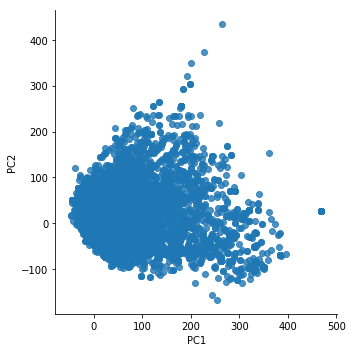

In [23]:
pcca = pd.DataFrame(pca.transform(df), columns=['PC1','PC2','PC3'])
sns.lmplot(x='PC1', y='PC2', data=pcca, fit_reg=False);

In [24]:
df.describe(include='all')

,_NormalizedVDWVD1075,_PolarityD1075,_SecondaryStrD3025,_PolarityD3100,_ChargeD1100,_SecondaryStrT23,_PolarityD3025,_NormalizedVDWVC1,_NormalizedVDWVC3,_HydrophobicityT23,...,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_PolarizabilityD1001,_NormalizedVDWVD2075,_ChargeD2100,_PolarizabilityD2100,_PolarityC1,_PolarityC3,_PolarityC2
count,123105.000000,123105.000000,123105.00000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,...,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000,123105.000000
mean,72.790788,73.273983,23.46675,96.553100,95.447523,0.165644,22.617521,0.373445,0.249005,0.231801,...,0.435133,0.313553,0.250193,1.752795,73.644482,99.684890,98.822909,0.340407,0.138188,0.192675
std,5.918602,5.049579,6.76117,9.382577,10.227132,0.046508,9.734884,0.064018,0.048133,0.046537,...,0.055219,0.055768,0.048163,3.811008,5.988690,2.284006,3.441657,0.044030,0.037318,0.039049
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.787000,71.635000,20.61900,96.748000,95.263000,0.138000,17.391000,0.335000,0.221000,0.206000,...,0.402000,0.283000,0.222000,0.437000,71.698000,99.775000,98.671000,0.318000,0.119000,0.171000
50%,73.554000,73.913000,23.48900,98.932000,98.218000,0.164000,22.034000,0.371000,0.250000,0.232000,...,0.433000,0.314000,0.250000,0.800000,74.260000,100.000000,99.584000,0.340000,0.138000,0.193000
75%,75.849000,75.786000,26.47100,100.000000,99.517000,0.190000,27.027000,0.409000,0.277000,0.256000,...,0.466000,0.344000,0.276000,1.739000,76.667000,100.000000,100.000000,0.363000,0.157000,0.212000
max,100.000000,100.000000,100.00000,100.000000,100.000000,0.800000,100.000000,1.000000,1.000000,0.765000,...,1.000000,1.000000,0.889000,100.000000,100.000000,100.000000,100.000000,1.000000,0.714000,1.000000


In [3]:
def clean2(zippath, filenames):
    df_seq = pd.read_csv(ZipFile(zippath, 'r').open(filenames[0]))
    df_dup = pd.read_csv(ZipFile(zippath, 'r').open(filenames[1]))
    df_merge = df_dup.merge(df_seq,how='inner',on='structureId')
#     data = pd.read_csv(init)
    df_merge.rename({'macromoleculeType_x':'macromoleculeType',
                                            'residueCount_y':'residueCount'},axis=1,inplace=True)
    df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)
    return df_merge

df_merge = clean2("C:/Users/Gerardo/ADB/Capstone/PyBioMed-1.0/11797_16251_bundle_archive.zip",
             ['pdb_data_seq.csv','pdb_data_no_dups.csv']
            )




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')

In [64]:
df_merge_protein = df_merge[df_merge.macromoleculeType=='Protein']
df_merge_proteins = df_merge_protein[df_merge_protein.chainId=='A']
df_merge_proteins

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
7,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165
8,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
11,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167
12,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
15,104L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,2.80,37541.04,NaN,NaN,3.04,59.49,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,332
17,104M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,1.71,18030.63,NaN,NaN,1.87,34.30,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 7.0",7.0,1999.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,153
22,105M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,2.02,18030.63,NaN,NaN,1.83,33.00,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 9.0",9.0,1999.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,153
27,106M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,1.99,18181.84,NaN,NaN,3.05,59.70,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
30,107L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,1.80,18825.51,NaN,NaN,2.81,56.17,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKGEL...,164


In [65]:
df_merge_proteins.isnull().sum()

structureId                     0
classification                  1
experimentalTechnique           0
macromoleculeType               0
resolution                  10652
structureMolecularWeight        0
crystallizationMethod       38500
crystallizationTempK        37553
densityMatthews             13065
densityPercentSol           13047
pdbxDetails                 18688
phValue                     30761
publicationYear             21458
chainId                         0
sequence                        0
residueCount                    0
dtype: int64

In [83]:
df_merge_proteins2 = df_merge_proteins.drop([
 'experimentalTechnique',
 'chainId',
 'residueCount',
 'macromoleculeType',
 'crystallizationMethod',
 'crystallizationTempK',
 'densityMatthews',
 'densityPercentSol',
 'pdbxDetails',
 'phValue',
 'publicationYear',
 'resolution'], axis=1)
df_merge_proteins3 = df_merge_proteins2.dropna()
df_merge_proteins3

,structureId,classification,structureMolecularWeight,sequence
4,101M,OXYGEN TRANSPORT,18112.80,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,HYDROLASE(O-GLYCOSYL),18926.61,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,OXYGEN TRANSPORT,18010.64,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,HYDROLASE(O-GLYCOSYL),19092.72,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,OXYGEN TRANSPORT,18093.78,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
15,104L,HYDROLASE(O-GLYCOSYL),37541.04,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...
17,104M,OXYGEN TRANSPORT,18030.63,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...
22,105M,OXYGEN TRANSPORT,18030.63,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...
27,106M,OXYGEN TRANSPORT,18181.84,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
30,107L,HYDROLASE(O-GLYCOSYL),18825.51,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKGEL...


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
tab = df_merge_proteins2.classification.value_counts(normalize=True)
tab[:15]

HYDROLASE                                0.161914
TRANSFERASE                              0.122587
OXIDOREDUCTASE                           0.096888
LYASE                                    0.033869
TRANSCRIPTION                            0.027918
IMMUNE SYSTEM                            0.026307
TRANSPORT PROTEIN                        0.025238
SIGNALING PROTEIN                        0.022607
ISOMERASE                                0.020380
HYDROLASE/HYDROLASE INHIBITOR            0.018785
VIRAL PROTEIN                            0.017837
LIGASE                                   0.016607
PROTEIN BINDING                          0.014939
STRUCTURAL GENOMICS, UNKNOWN FUNCTION    0.013408
MEMBRANE PROTEIN                         0.013328
Name: classification, dtype: float64

In [85]:
# add your code here to compute the explained and cumulative variance

# Calculate the explained variance
exp_var = [i*100 for i in tab.values]

# Calculate the cumulative variance
cum_var = np.cumsum(tab.values*100)

# Combine both in a data frame
pca_var = pd.DataFrame(data={'Explained Var': exp_var, 'Cumulative Var': cum_var})
pca_var.head(50)

,Cumulative Var,Explained Var
0,16.191378,16.191378
1,28.450091,12.258712
2,38.138846,9.688755
3,41.525781,3.386935
4,44.317593,2.791812
5,46.948277,2.630684
6,49.472082,2.523805
7,51.732737,2.260656
8,53.770728,2.037991
9,55.649210,1.878482


In [86]:
filtered_classes = list(tab.keys()[:10])
df_merge_proteins3 = df_merge_proteins2[df_merge_proteins2.classification.isin(filtered_classes)]
df_merge_proteins3

,structureId,classification,structureMolecularWeight,sequence
67,117E,HYDROLASE,65203.21,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
76,11BA,HYDROLASE,28700.28,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
78,11BG,HYDROLASE,30391.41,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
80,11GS,TRANSFERASE,48366.94,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...
180,14GS,TRANSFERASE,47146.02,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...
246,16GS,TRANSFERASE,47242.08,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...
277,177L,HYDROLASE,18562.37,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
280,178L,HYDROLASE,18633.27,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
284,17GS,TRANSFERASE,48010.02,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...
313,18GS,TRANSFERASE,48092.84,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...


In [ ]:
# add your code here to display both the explained and cumulative variance
# fig = plt.figure(figsize=(10,7))

ax = sns.barplot(
        x = pca_var.index, 
        y = 'Explained Var',  data = pca_var )
ax.set(
        xlabel = 'Principal Components', 
        ylabel = 'Explained Variance' )

# fig = plt.figure(figsize=(10,7))

ax = sns.barplot(
        x = pca_var.index, 
        y = 'Cumulative Var',  data = pca_var )
ax.set(
        xlabel = 'Principal Components', 
        ylabel = 'Cumulative Variance' )

In [100]:
def clean2(zippath, filenames):
    aaa = ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
    df_seq = pd.read_csv(ZipFile(zippath, 'r').open(filenames[0]))
    df_dup = pd.read_csv(ZipFile(zippath, 'r').open(filenames[1]))
    df_merge = df_dup.merge(df_seq,how='inner',on='structureId')
#     data = pd.read_csv(init)
    df_merge.rename({'macromoleculeType_x':'macromoleculeType',
                                            'residueCount_y':'residueCount'},axis=1,inplace=True)
    df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)
    df_merge_protein = df_merge[df_merge.macromoleculeType=='Protein']
    df_merge_proteins = df_merge_protein[df_merge_protein.chainId=='A']

    df_merge_proteins2 = df_merge_proteins.drop([
                         'experimentalTechnique',
                         'chainId',
                         'residueCount',
                         'macromoleculeType',
                         'crystallizationMethod',
                         'crystallizationTempK',
                         'densityMatthews',
                         'densityPercentSol',
                         'pdbxDetails',
                         'phValue',
                         'publicationYear',
                         'resolution'], axis=1)
    df_merge_proteins3 = df_merge_proteins2.dropna()
    tab = df_merge_proteins2.classification.value_counts(normalize=True)
    filtered_classes = list(tab.keys()[:10])
    df_merge_proteins3 = df_merge_proteins2[df_merge_proteins2.classification.isin(filtered_classes)]
    mask = df_merge_proteins3.sequence.apply(lambda x: set(x) <= set(aaa))
    df_masked = df_merge_proteins3[mask]
    sequences = df_masked.sequence.tolist()
    indices = df_masked.structureId
    return sequences, indices #, df_merge_proteins3 

## Final script

In [7]:
import pandas as pd
import numpy as np
from PyBioMed.PyGetMol import GetProtein
from PyBioMed import Pyprotein
from zipfile import ZipFile
import os
import sys
limit = None

    
def descr_dataframe_autocorrelation(array, rows, columns):
    
    ## to dataframe
    df = pd.DataFrame(array, columns=columns, index=rows)
    
    return df

def create_array(sequences, indexes, limit=limit):
    
    # to generate the dataframe columns
    protein = Pyprotein.PyProtein(sequences[0])
    columns = []    
    columns.extend(protein.GetMoreauBrotoAuto().keys())
    columns.extend(protein.GetMoranAuto().keys())
    columns.extend(protein.GetGearyAuto().keys())
    
    # to create the dataframe rows
    rows = indexes[:limit]
    
    # array created with rows-keys shape
    array = np.zeros([len(rows),len(columns)])
    
    # descriptor generation
    for row in range(len(rows)):
        protein_class = Pyprotein.PyProtein(sequences[row])
        dicti = {}
        dicti.update(protein_class.GetMoreauBrotoAuto())
        dicti.update(protein_class.GetMoranAuto())
        dicti.update(protein_class.GetGearyAuto())
        
        # array value assignation
        for key in dicti.keys():
            array[row, columns.index(key)] = dicti[key]
            
        # report
        if row%100 == 0:
            print('Done '+str(row) + ' of '+ str(len(rows)))
        elif row == len(rows):
            print('Done '+ str(row))
        
    return array, rows, columns


def clean2(zippath, filenames):
    
    # amino-acid letters
    aa = ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
    
    # files to dataframe
    with ZipFile(zippath, 'r').open(filenames[0]) as file1:
        df_seq = pd.read_csv(file1)        
    with ZipFile(zippath, 'r').open(filenames[1]) as file2:
        df_dup = pd.read_csv(file2)
    
    # merge the dataframes
    df_merge = df_dup.merge(df_seq,how='inner',on='structureId')
    df_merge.rename({'macromoleculeType_x':'macromoleculeType',
                                            'residueCount_y':'residueCount'},axis=1,inplace=True)
    
    # clean the columns
    df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)
    df_merge_protein = df_merge[df_merge.macromoleculeType=='Protein']
    df_merge_proteins = df_merge_protein[df_merge_protein.chainId=='A']
    df_merge_proteins2 = df_merge_proteins.drop([
                         'experimentalTechnique',
                         'chainId',
                         'residueCount',
                         'macromoleculeType',
                         'crystallizationMethod',
                         'crystallizationTempK',
                         'densityMatthews',
                         'densityPercentSol',
                         'pdbxDetails',
                         'phValue',
                         'publicationYear',
                         'resolution'], axis=1)
    
    # drop na
    df_merge_proteins3 = df_merge_proteins2.dropna()
    
    # to identify the top 10 classes
    tab = df_merge_proteins2.classification.value_counts(normalize=True)
    filtered_classes = list(tab.keys()[:10])
    df_merge_proteins3 = df_merge_proteins2[df_merge_proteins2.classification.isin(filtered_classes)]
    
    # to delete unreadable amino-acids letter
    mask = df_merge_proteins3.sequence.apply(lambda x: set(x) <= set(aa))
    df_masked = df_merge_proteins3[mask]
    
    # cleansed sequences to list
    sequences = df_masked.sequence.tolist()
    
    # indexes
    indexes = df_masked.structureId
    return sequences, indexes


def pipeline(zip_file, file_list):
    
    sequences, indexes = clean2(zip_file, file_list)
    array, rows, columns = create_array(sequences, indexes)
    df = descr_dataframe_autocorrelation(array, rows, columns)
    return df
    
zip_file = sys.argv[1]
outfile = sys.argv[2]
file_list = ['pdb_data_seq.csv','pdb_data_no_dups.csv']

df = pipeline(zip_file, file_list)
df.to_csv(outfile)



In [8]:
zip_file = "11797_16251_bundle_archive.zip"
file_list = ['pdb_data_seq.csv','pdb_data_no_dups.csv']

pipeline(zip_file, file_list)
df.to_csv('pr1_classification.csv')

Done 0 of 10
